<a href="https://colab.research.google.com/github/CHINTALA-SARADA/APPLIED-PLOTTING-ASS4/blob/master/BAJAJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



# Importing the training set
dataset_train = pd.read_csv('/content/sample_data/BAJFINANCE.csv')

training_set = dataset_train.iloc[:,4:5].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 3439):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))






print('PART 1 COMPLETED')

  # Part 2 - Building the RNN

# Importing the Keras libraries and packages
#!pip uninstall keras
#!install keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history_fitting=regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


print('PART 2 COMPLETED')
  

PART 1 COMPLETED
Epoch 1/100
106/106 [==============================] - 5s 51ms/step - loss: 0.2258
Epoch 2/100
106/106 [==============================] - 5s 50ms/step - loss: 0.0562
Epoch 3/100
106/106 [==============================] - 5s 49ms/step - loss: 0.0241
Epoch 4/100
106/106 [==============================] - 5s 50ms/step - loss: 0.0170
Epoch 5/100
106/106 [==============================] - 5s 49ms/step - loss: 0.0119
Epoch 6/100
106/106 [==============================] - 5s 48ms/step - loss: 0.0108
Epoch 7/100
106/106 [==============================] - 5s 50ms/step - loss: 0.0089
Epoch 8/100
106/106 [==============================] - 5s 51ms/step - loss: 0.0070
Epoch 9/100
106/106 [==============================] - 5s 50ms/step - loss: 0.0063
Epoch 10/100
106/106 [==============================] - 5s 50ms/step - loss: 0.0054
Epoch 11/100
106/106 [==============================] - 5s 51ms/step - loss: 0.0046
Epoch 12/100
106/106 [==============================] - 5s 50ms/step

In [30]:
#Extracting loss logs into csv file
loss_history=history_fitting.history['loss']

df_loss=pd.DataFrame(loss_history)
df_loss.to_csv('lossRNN.csv')
print('part 2 final')

part 2 final


[[3979.3616]
 [3973.802 ]
 [3989.342 ]
 [3969.7576]
 [3867.0537]
 [3861.4573]
 [3883.6824]
 [3926.1614]
 [3917.5405]
 [3923.3762]
 [3942.8672]
 [3966.2058]
 [3953.8972]
 [3960.0642]
 [3933.5557]
 [3936.1975]
 [3933.0837]
 [3926.2295]
 [3957.833 ]
 [3943.972 ]
 [3964.315 ]
 [4060.146 ]
 [4044.5698]
 [4045.911 ]
 [4038.9563]
 [4134.0967]
 [4143.366 ]
 [4213.218 ]
 [4192.244 ]
 [4258.7344]
 [4266.8784]
 [4285.9614]
 [4284.8994]
 [4304.627 ]
 [4301.3745]
 [4298.79  ]
 [4344.67  ]
 [4352.935 ]
 [4323.8228]
 [4320.5713]
 [4323.6577]
 [4307.6074]
 [4162.8755]
 [4105.0176]
 [4148.4385]
 [4079.254 ]
 [4073.7336]
 [3996.545 ]
 [3910.799 ]
 [3900.0034]
 [3721.9722]
 [3800.3901]
 [3653.56  ]
 [3534.2698]
 [3255.652 ]
 [3059.3733]
 [3085.1953]
 [2657.1755]
 [2639.467 ]
 [2622.8699]
 [2764.4695]
 [2549.854 ]
 [2346.9233]
 [2249.895 ]
 [2315.9917]
 [2207.8313]
 [2201.2788]
 [2231.147 ]
 [2435.497 ]
 [2289.7153]
 [2194.7324]
 [2214.2498]
 [2320.739 ]
 [2308.7502]
 [2165.0933]
 [2194.896 ]
 [2268.8772]

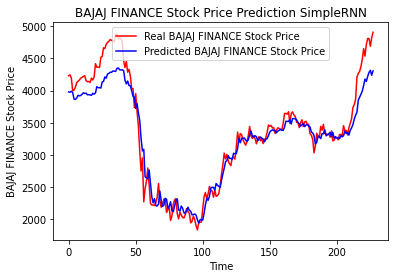

In [31]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price 
dataset_test = pd.read_csv('/content/sample_data/BTEST.csv')
real_stock_price = dataset_test.iloc[:, 4:5].values

# Append Total Dataset
dataset_total = pd.concat((dataset_train['closeprice'], dataset_test['closeprice']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 288):
 X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



#Passing inputs to predict data
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

#Writing Predicted data to a csvfile
#df = pd.DataFrame(real_stock_price,predicted_stock_price)
df = pd.DataFrame(predicted_stock_price)
df.to_csv("SimpleRNN_Output.csv")
print(predicted_stock_price)
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real BAJAJ FINANCE Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted BAJAJ FINANCE Stock Price')
plt.title('BAJAJ FINANCE Stock Price Prediction SimpleRNN')
plt.xlabel('Time')
plt.ylabel('BAJAJ FINANCE Stock Price')
plt.legend()
plt.show()




In [32]:
# Long Short Term Memory 

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train1 = pd.read_csv('/content/sample_data/BAJFINANCE.csv')
training_set1 = dataset_train1.iloc[:,4:5].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled1 = sc.fit_transform(training_set1)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 3439):
 X_train.append(training_set_scaled1[i-60:i, 0])
 y_train.append(training_set_scaled1[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor1 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor1.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor1.add(LSTM(units = 50, return_sequences = True))
regressor1.add(Dropout(0.2))
      # Adding a fourth LSTM layer and some Dropout regularisation
regressor1.add(LSTM(units = 50))
regressor1.add(Dropout(0.2))

# Adding the output layer
regressor1.add(Dense(units = 1))

# Compiling the LSTM
regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the LSTM to the Training set
history_fitting1=regressor1.fit(X_train, y_train, epochs = 100, batch_size = 32)

#Extracting loss logs into csv file
loss_history1=history_fitting1.history['loss']

df_loss1=pd.DataFrame(loss_history1)
df_loss1.to_csv('lossLSTM.csv')




# Part 3 - Making the predictions and visualising the results

# Getting the real stock price 
dataset_test1 = pd.read_csv('/content/sample_data/BTEST.csv')
real_stock_price1 = dataset_test1.iloc[:, 4:5].values

# Getting the predicted stock price
dataset_total1 = pd.concat((dataset_train1['closeprice'], dataset_test1['closeprice']), axis = 0)
inputs = dataset_total1[len(dataset_total1) - len(dataset_test1) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 288):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))



#Passing inputs to predict data
predicted_stock_price1 = regressor1.predict(X_test)
predicted_stock_price1 = sc.inverse_transform(predicted_stock_price1)



Epoch 1/100
106/106 [==============================] - 12s 111ms/step - loss: 0.0037
Epoch 2/100
106/106 [==============================] - 12s 110ms/step - loss: 0.0012
Epoch 3/100
106/106 [==============================] - 12s 109ms/step - loss: 0.0012
Epoch 4/100
106/106 [==============================] - 12s 110ms/step - loss: 0.0011
Epoch 5/100
106/106 [==============================] - 12s 114ms/step - loss: 0.0012
Epoch 6/100
106/106 [==============================] - 13s 118ms/step - loss: 9.4611e-04
Epoch 7/100
106/106 [==============================] - 12s 118ms/step - loss: 0.0011
Epoch 8/100
106/106 [==============================] - 12s 114ms/step - loss: 9.0816e-04
Epoch 9/100
106/106 [==============================] - 12s 114ms/step - loss: 8.9591e-04
Epoch 10/100
106/106 [==============================] - 12s 115ms/step - loss: 9.3898e-04
Epoch 11/100
106/106 [==============================] - 12s 118ms/step - loss: 8.2258e-04
Epoch 12/100
106/106 [=====================

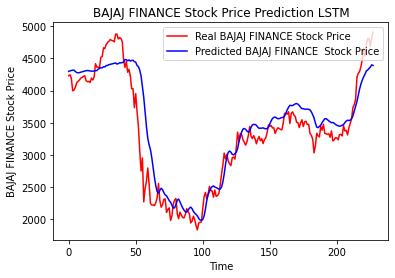

In [33]:
#Writing Data to csvfile
df = pd.DataFrame(predicted_stock_price1)
df.to_csv("LSTM_Output.csv")

# Visualising the results
plt.plot(real_stock_price1, color = 'red', label = 'Real BAJAJ FINANCE Stock Price')
plt.plot(predicted_stock_price1, color = 'blue', label = 'Predicted BAJAJ FINANCE  Stock Price')
plt.title('BAJAJ FINANCE Stock Price Prediction LSTM')
plt.xlabel('Time')
plt.ylabel('BAJAJ FINANCE Stock Price')
plt.legend()
plt.show()


In [34]:
#Gated Recurrent Unit

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train2 = pd.read_csv('/content/sample_data/BAJFINANCE.csv')
training_set2 = dataset_train2.iloc[:,4:5].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled2 = sc.fit_transform(training_set2)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 3439):
    X_train.append(training_set_scaled2[i-60:i, 0])
    y_train.append(training_set_scaled2[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))




In [35]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

# Initialising the RNN
regressor2 = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor2.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor2.add(Dropout(0.2))

# Adding a second GRU layer and some Dropout regularisation
regressor2.add(GRU(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

# Adding a third GRU layer and some Dropout regularisation
regressor2.add(GRU(units = 50, return_sequences = True))
regressor2.add(Dropout(0.2))

# Adding a fourth GRU layer and some Dropout regularisation
regressor2.add(GRU(units = 50))
regressor2.add(Dropout(0.2))

# Adding the output layer
regressor2.add(Dense(units = 1))

# Compiling the RNN
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history_fitting2=regressor2.fit(X_train, y_train, epochs = 100, batch_size = 32)

#Extracting loss logs into csv file
loss_history2=history_fitting2.history['loss']
df_loss2=pd.DataFrame(loss_history2)
df_loss2.to_csv('lossGRU.csv')



Epoch 1/100
106/106 [==============================] - 12s 113ms/step - loss: 0.0065
Epoch 2/100
106/106 [==============================] - 12s 117ms/step - loss: 0.0015
Epoch 3/100
106/106 [==============================] - 12s 116ms/step - loss: 0.0011
Epoch 4/100
106/106 [==============================] - 12s 115ms/step - loss: 0.0011
Epoch 5/100
106/106 [==============================] - 12s 115ms/step - loss: 0.0011
Epoch 6/100
106/106 [==============================] - 12s 114ms/step - loss: 0.0011
Epoch 7/100
106/106 [==============================] - 12s 112ms/step - loss: 0.0011
Epoch 8/100
106/106 [==============================] - 12s 114ms/step - loss: 9.8474e-04
Epoch 9/100
106/106 [==============================] - 12s 114ms/step - loss: 9.2842e-04
Epoch 10/100
106/106 [==============================] - 12s 114ms/step - loss: 8.7202e-04
Epoch 11/100
106/106 [==============================] - 13s 120ms/step - loss: 8.1112e-04
Epoch 12/100
106/106 [=========================

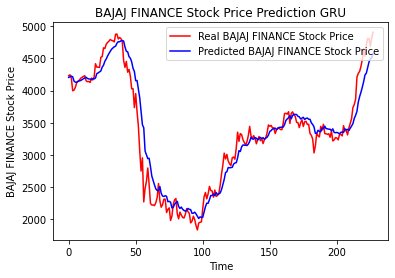

In [37]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price
dataset_test2 = pd.read_csv('/content/sample_data/BTEST.csv')
real_stock_price2 = dataset_test2.iloc[:, 4:5].values

# Getting the predicted stock price
dataset_total2 = pd.concat((dataset_train2['closeprice'], dataset_test2['closeprice']), axis = 0)
inputs = dataset_total2[len(dataset_total2) - len(dataset_test2) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 288):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Passing inputs to predict data
predicted_stock_price2 = regressor2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)

#Writing Data to csvfile
df = pd.DataFrame(predicted_stock_price2)
df.to_csv("GRU_Output.csv")

# Visualising the results
plt.plot(real_stock_price2, color = 'red', label = 'Real BAJAJ FINANCE Stock Price')
plt.plot(predicted_stock_price2, color = 'blue', label = 'Predicted BAJAJ FINANCE Stock Price')
plt.title('BAJAJ FINANCE Stock Price Prediction GRU')
plt.xlabel('Time')
plt.ylabel('BAJAJ FINANCE Stock Price')
plt.legend()
plt.show()


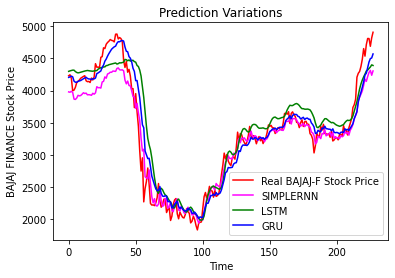

In [42]:
plt.plot(real_stock_price2, color = 'red', label = 'Real BAJAJ-F Stock Price')
plt.plot(predicted_stock_price, color = 'Magenta', label = 'SIMPLERNN')
plt.plot(predicted_stock_price1, color = 'Green', label = 'LSTM')
plt.plot(predicted_stock_price2, color = 'blue', label = 'GRU')
plt.title('Prediction Variations')
plt.xlabel('Time')
plt.ylabel('BAJAJ FINANCE Stock Price')
plt.legend()
plt.show()

In [65]:
import math
from sklearn.metrics import mean_squared_error
def return_rmse(real_stock_price2, predicted_stock_price):
    rmse = math.sqrt(mean_squared_error(real_stock_price2, predicted_stock_price ))
    print('the root mean squared error is: {}'.format(rmse))


In [66]:

return_rmse(real_stock_price2, predicted_stock_price)

the root mean squared error is: 235.42128087089898


In [67]:
return_rmse(real_stock_price2, predicted_stock_price1)

the root mean squared error is: 327.6877721669985


In [68]:
return_rmse(real_stock_price2, predicted_stock_price2)

the root mean squared error is: 227.7519545035246
